# Chapter 2: The Simple Regression Model
## Agenda

- `statsmodels.formula.api`によるOLS regressionの方法を確認
- `seaborn`を用いたOLS fitted line plot方法の確認
- Goodness of fitのメトリクスのレビュー

## REMARK

- Dataは`https://github.com/spring-haru/wooldridge` repositoryのものを活用

## 参考

- Model Performance Metrics: [MLmastery](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)
- ML dataset: [MLmastery](https://github.com/jbrownlee/Datasets)

### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


### Python

In [2]:
!python -V

Python 3.7.4


### Install Packages

In [3]:
pass

### Import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn import metrics

### Setting

In [5]:
plt.style.use('ggplot')

## 1. Bivariate OLS Regression

WooldridgeのCEO Salary and Return on Equity Dataを用いて、以下のことを確認する

- `statsmodels.formula.api`によるOLS
- `seaborn`によるfitted line plot

In [6]:
url = 'https://raw.githubusercontent.com/RyoNakagami/wooldridge/master/raw_data/data_csv/ceosal1.csv'
df = pd.read_csv(url)
df.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   pcsalary  209 non-null    int64  
 2   sales     209 non-null    float64
 3   roe       209 non-null    float64
 4   pcroe     209 non-null    float64
 5   ros       209 non-null    int64  
 6   indus     209 non-null    int64  
 7   finance   209 non-null    int64  
 8   consprod  209 non-null    int64  
 9   utility   209 non-null    int64  
 10  lsalary   209 non-null    float64
 11  lsales    209 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 19.7 KB


回帰式は以下

$$
\text{salary} = \beta_0 + \beta_1 \text{roe} + u
$$

In [8]:
reg = smf.ols('salary ~ roe', data = df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Thu, 04 Jun 2020   Prob (F-statistic):             0.0978
Time:                        17:03:34   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

In [9]:
print(res.params)

Intercept    963.191336
roe           18.501186
dtype: float64


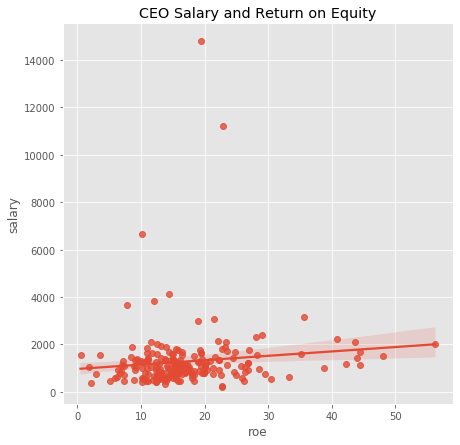

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
sns.regplot(x="roe", y="salary", data=df, ax = ax)
ax.set_title('CEO Salary and Return on Equity');

### Residuals and fitted values

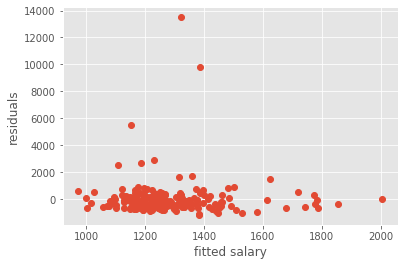

In [11]:
u = res.resid
yhat = res.fittedvalues
plt.plot(yhat, u, marker = 'o', linestyle = '')
plt.xlabel('fitted salary')
plt.ylabel('residuals');

## 2. Goodness of Fit

modelの精度を図る指標はmodelがclassification problemなのかregression problemなのかによってどれを用いるかは異なる。

- Classification: Accuracy, Log Loss, AUC,Precision-Recall Curves, f1-score, Confusion Matrix, Classification Report
- Regression: Mean Absolute Error, Mean Squared Error, R-squared, Adjusted R-squared


### Classification Metrics

#### 1. Classification Accuracy

- Classification Accuracyとはpredictionの正答率のこと
- それぞれのクラスのthe number of observationsが等しい時でしか使えない

##### DATA

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

##### What To Do

- classを予測する



In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
Y = df['class'].values
X = df.iloc[:, 0:8].values

In [16]:
kfold = model_selection.KFold(n_splits=10, random_state=42)

In [17]:
model = LogisticRegression(solver = 'liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: {:.3} ({:.3})".format(np.mean(results), np.std(results)))

Accuracy: 0.77 (0.0484)


#### 2. Log Loss

Labelが$y\in \{0, 1\}$で与えられているBinary Classification Problemを考える。このときのLog Lossは

$$
L = - \sum_{i}(y_i\log(p_i) + (1-y_i)\log(1-p_i))
$$

where $p_i = Pr(y_i = 1)$. Multiclass caseの場合は、

$$
L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}
$$

##### REMARK

- Multi-class caseによるBinary-class caseの表し方は、$y = 1$をクラス1, $y = 0$をクラス0として、$K = \{0, 1\}$とすれば良い。

In [18]:
from sklearn.metrics import log_loss

In [19]:
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)

0.1738073366910675

`sklearn.model_selection.cross_validate`ではnegative log loss = log likelihoodしかない。

In [20]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: {:.3} ({:.3})".format(np.mean(results), np.std(results)))

Accuracy: -0.493 (0.047)


#### 3. Area Under ROC Curve

- AUCとはArea Under ROC Curveの略称のこと。
- Threshold level毎のTrue Positive rateとFalse positive RateのplotがROC

$$
\begin{aligned}
\text{True Positive Rate} &= \text{True Positives} / (\text{True Positives + False Negatives})\\
\text{False Positive Rate} &= \text{False Positives} / (\text{False Positives + True Negatives})
\end{aligned}
$$

In [21]:
N = 100000
X, y = make_classification(n_samples=N, n_classes=2, random_state=42)
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = LogisticRegression(solver = 'liblinear')
method = 'predict_proba'
results = model_selection.cross_val_predict(model, X, y, cv=kfold, method=method)

In [22]:
## y = 1 prob array
lr_probs = results[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(N)]

In [23]:
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.941


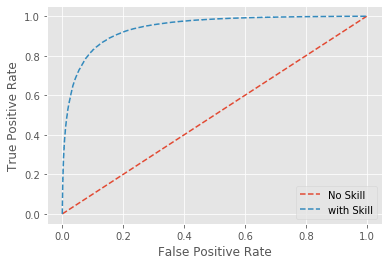

In [24]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='with Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend();

`cross_val_score`を用いてAUCを計算する場合は

In [25]:
model = LogisticRegression(solver = 'liblinear')
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: {:.3} ({:.3})".format(np.mean(results), np.std(results)))

Accuracy: 0.941 (0.0027)


#### 4. Precision-Recall Curves

sklearn syntax is

```
precision, recall, thresholds = precision_recall_curve(true_y, probs)
```

- Precision: `Precision = True Positives / (True Positives + False Positives)`、Trueと分類したうち、真にTrueの割合
- Recall : `Recall = True Positives / (True Positives + False Negatives)`、Trueのうち正しく分類できた割合

In [26]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# predict probabilities
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)

# base line
no_skill = len(testy[testy==1]) / len(testy)

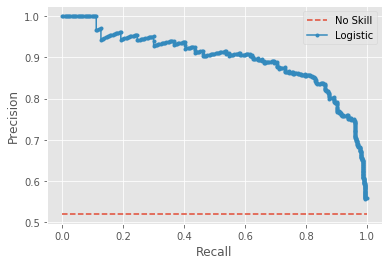

In [28]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();

##### REMARK: AUC と Precision-Recall Curveの棲み分け

- ROCは各classのobservationsのsizeが等しいときに推奨される
- Precision-Recall Curveは class imbalanceが存在するとき

#### 5. F1 Score

$$
F1 = 2\frac{P \times R}{P+R} = 2/(1/P + 1/ R)
$$

- a weighted harmonic mean of the precision and recall

###### Multi-classとF1 Score

<img src = "https://github.com/RyoNakagami/omorikaizuka/blob/master/algorithm/f1_score.jpg?raw=true">


In [29]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(metrics.f1_score(y_true, y_pred, average='weighted'))
print(metrics.f1_score(y_true, y_pred, average='micro'))
print(metrics.f1_score(y_true, y_pred, average='macro'))
print(metrics.f1_score(y_true, y_pred, average=None))

0.26666666666666666
0.3333333333333333
0.26666666666666666
[0.8 0.  0. ]


#### 6. Confusion Matrix

- x-axis (horizontal): prediction outcomes
- y-axis (vertical): accuracy outcomes

In [30]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)
Y = df['class'].values
X = df.iloc[:, 0:8].values
kfold = model_selection.KFold(n_splits=4, random_state=42)
model = LogisticRegression(solver='liblinear') ## because of the small dataset
method = 'predict'
results = model_selection.cross_val_predict(model, X, Y, cv=kfold, method=method)
matrix = metrics.confusion_matrix(Y, results)
print(matrix)

[[446  54]
 [124 144]]


#### 7. Classification Report

the precision, recall, f1-score and support for each classを記載したTableを返す

In [31]:
matrix = metrics.classification_report(Y, results)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



### Regression Metrics

- MAE
- MSE
- R-squared
- Adjusted R-squared
- MAPE
- Tweedie deviation score etc

#### 1. R-squared and Adjusted R-squared

- SSR: sum of squared residual
- SST: total sum of squared
- SSE: explained sum of squared

$$
\begin{aligned}
R^2 & = \frac{SSR}{SST}\\
R^2_{adjusted} &= 1 - \frac{n-1}{n-k}\frac{SSE}{SST}
\end{aligned}
$$

- R-squaredはfeatureを足せば足すほど改善されるので、あまり使わない。


## 3. 変数変換
### Wage and Education

In [32]:
url = 'https://raw.githubusercontent.com/RyoNakagami/wooldridge/master/raw_data/data_csv/wage1.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [33]:
reg = smf.ols(formula = 'np.log(wage) ~ wage', data = df)
result = reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     3774.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.31e-241
Time:                        17:03:42   Log-Likelihood:                 140.03
No. Observations:                 526   AIC:                            -276.1
Df Residuals:                     524   BIC:                            -267.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8281      0.015     54.230      0.0

### CEO Salary and Firm Sales

In [34]:
url = 'https://raw.githubusercontent.com/RyoNakagami/wooldridge/master/raw_data/data_csv/ceosal1.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   pcsalary  209 non-null    int64  
 2   sales     209 non-null    float64
 3   roe       209 non-null    float64
 4   pcroe     209 non-null    float64
 5   ros       209 non-null    int64  
 6   indus     209 non-null    int64  
 7   finance   209 non-null    int64  
 8   consprod  209 non-null    int64  
 9   utility   209 non-null    int64  
 10  lsalary   209 non-null    float64
 11  lsales    209 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 19.7 KB


In [35]:
reg = smf.ols(formula = 'np.log(salary) ~ np.log(sales)', data = df)
result = reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.70e-12
Time:                        17:03:42   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8220      0.288     16.723

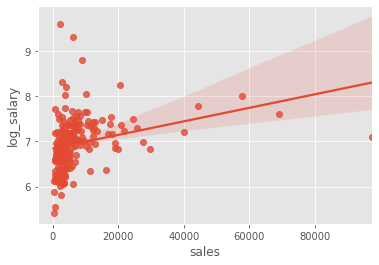

In [36]:
df['log_salary'] = np.log(df['salary'])
sns.regplot(x = 'sales', y = 'log_salary', data = df)

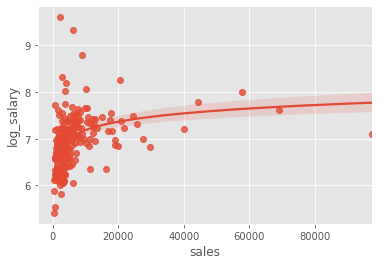

In [37]:
sns.regplot(x = 'sales', y = 'log_salary', data = df, logx = True)

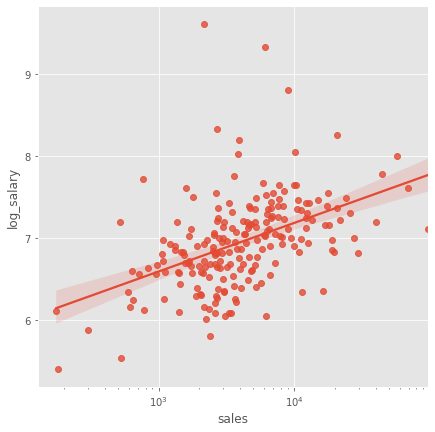

In [38]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.regplot(x = 'sales', y = 'log_salary', data = df, logx = True, ax = ax)
ax.set_xscale('log')